In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sns.set()

In [3]:
categ = pd.read_csv("ravdess_categorical.csv")
quant = pd.read_csv("ravdess_quantitative.csv")

print(len(quant.columns))
display(categ.head())
display(quant.head())

18


,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex
0,speech,fearful,normal,Dogs are sitting by the door,2nd,2.0,F
1,speech,angry,normal,Dogs are sitting by the door,1st,16.0,F
2,song,happy,strong,Dogs are sitting by the door,2nd,16.0,F
3,speech,surprised,normal,Kids are talking by the door,1st,14.0,F
4,song,happy,strong,Dogs are sitting by the door,2nd,2.0,F


,kur,length_ms,mean,mfcc_max,mfcc_mean,mfcc_std,sc_kur,sc_max,sc_mean,sc_min,sc_skew,sc_std,skew,stft_kur,stft_min,stft_skew,stft_std,zero_crossings_sum
0,9.406061,3737,3.844916e-07,0.295213,0.364634,0.454352,0.123738,0.599230,0.648163,0.575309,0.325936,0.551824,0.273153,0.184467,0.437367,0.568130,0.689802,16995
1,19.564187,3904,-7.149491e-08,0.511665,0.505299,0.417233,0.048477,0.442238,0.535794,0.428604,0.312511,0.766001,0.292157,0.115827,0.397277,0.522350,0.782470,13906
2,4.881241,4671,2.429985e-06,0.254710,0.468918,0.382435,0.122017,0.442998,0.466500,0.480660,0.405462,0.553049,0.302659,0.173137,0.290466,0.595302,0.781861,18723
3,13.040259,3637,2.373929e-07,0.414398,0.273763,0.677553,0.054609,0.447119,0.569571,0.451037,0.260804,0.769826,-0.081014,0.091015,0.316737,0.515785,0.827419,11617
4,7.485109,4404,8.454691e-07,0.226628,0.438075,0.342806,0.115161,0.444813,0.526047,0.494780,0.430878,0.586275,0.414872,0.122901,0.343053,0.533742,0.772979,15137


In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [5]:
from sklearn.cluster import KMeans

filter_used = (categ.vocal_channel != 'pipo')
used_quant = quant.loc[filter_used]
used_cat = categ.loc[filter_used]
n_means = 3

scaler = MinMaxScaler()
X = used_quant.values
X = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=n_means, n_init=20, max_iter=100)
kmeans.fit(X)


KMeans(max_iter=100, n_clusters=3, n_init=20)

In [6]:
centers = kmeans.cluster_centers_
# used_quant['kmeans_labels'] = kmeans.labels_;
print(kmeans.inertia_)

571.8914669427122


/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


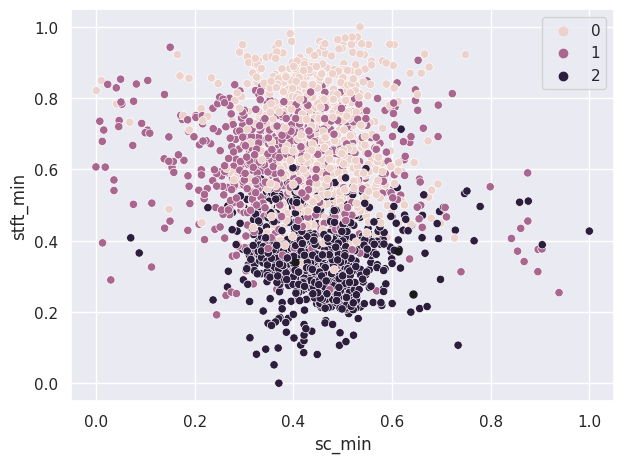

In [7]:
sns.scatterplot(data=used_quant, x="sc_min", y="stft_min", hue=kmeans.labels_)
plt.legend()
plt.scatter(centers[:,11], centers[:,17], marker='.', color="k", s=100)
plt.show()

<AxesSubplot: >

/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


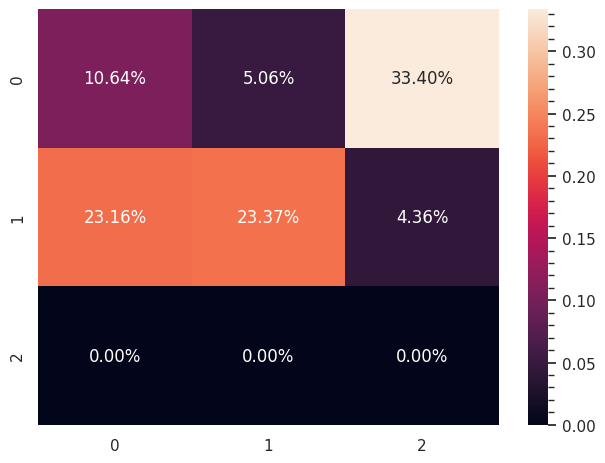

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

conf_m = confusion_matrix(pd.Categorical(used_cat.sex).codes, kmeans.labels_)
sns.heatmap(conf_m/np.sum(conf_m), annot = True, fmt='.2%')

In [9]:
import umap 

X = used_quant.values
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
reducer = umap.UMAP(n_neighbors=200)
embedding = reducer.fit_transform(X)

In [10]:
e_df = pd.DataFrame()
e_df["x"] = embedding[:,0]
e_df["y"] = embedding[:,1]
e_df["kmeans_label"] = kmeans.labels_
e_df = e_df.join(used_cat.reset_index())
display(e_df)

,x,y,kmeans_label,index,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex
0,4.523461,9.727573,2,0,speech,fearful,normal,Dogs are sitting by the door,2nd,2.0,F
1,4.634161,10.473763,2,1,speech,angry,normal,Dogs are sitting by the door,1st,16.0,F
2,6.535225,8.625264,2,2,song,happy,strong,Dogs are sitting by the door,2nd,16.0,F
3,3.963113,11.796972,2,3,speech,surprised,normal,Kids are talking by the door,1st,14.0,F
4,6.301679,9.242861,2,4,song,happy,strong,Dogs are sitting by the door,2nd,2.0,F
...,...,...,...,...,...,...,...,...,...,...,...
2447,1.096681,10.675244,0,2447,speech,calm,strong,Kids are talking by the door,1st,23.0,M
2448,1.022223,11.020894,0,2448,speech,calm,normal,Dogs are sitting by the door,1st,23.0,M
2449,1.164354,5.965925,1,2449,song,sad,strong,Dogs are sitting by the door,2nd,23.0,M
2450,1.405510,9.626926,0,2450,speech,surprised,normal,Kids are talking by the door,1st,GNAA,M


/home/djanloo/.local/share/virtualenvs/dynamiting-oYIjB6ZE/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


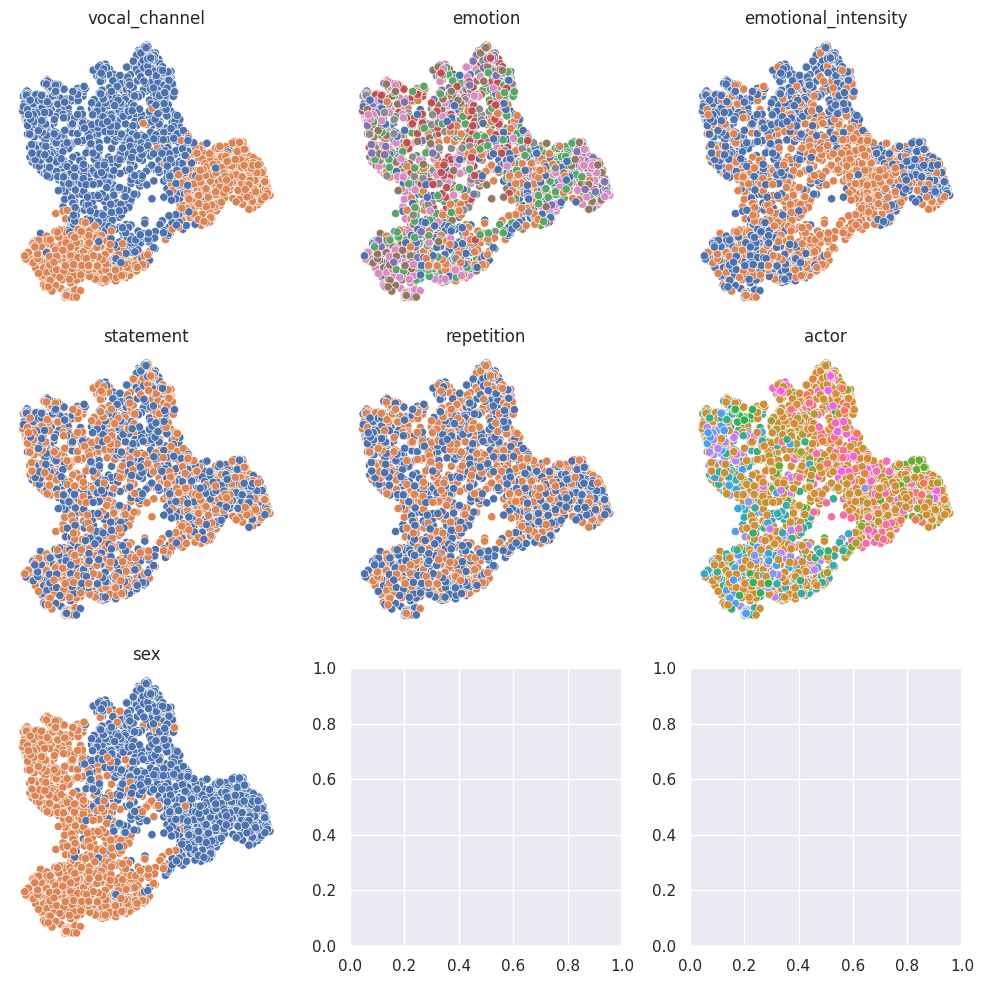

In [11]:
fig, axes = plt.subplots(3,3, figsize=(10,10))
axes = axes.flatten()
for ax, feat in zip(axes, used_cat.columns):

    sns.scatterplot(data=e_df, x="x", y="y", hue=feat, ax=ax, legend=False)
    ax.set_title(feat)
    ax.axis("off")